# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os

In [45]:
def barplot_group(df: pd.DataFrame, col_main: str, col_group: str,
                  title: str) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(18, 6))

    data = (df.groupby(
        [col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
            ha='center',  # центрирование
            va='center',
            xytext=(0, 7),
            textcoords='offset points',  # точка смещения относительно координаты
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

In [19]:
dict_types = {
    'user_id': 'int32',
    'part_of_day_day': 'int16',
    'part_of_day_evening': 'int16',
    'part_of_day_morning': 'int16',
    'part_of_day_night': 'int16',
    'sum_visits': 'int16',
    'day_pct': 'float32',
    'evening_pct': 'float32',
    'morning_pct': 'float32',
    'night_pct': 'float32',
    'act_days': 'int16',
    'request_cnt': 'int32',
    'avg_req_per_day': 'float32',
    'period_days': 'int16',
    'requests_std': 'float32',
    'act_days_pct': 'float32',
    'request_cnt_act_days': 'float32',
    'cpe_type_cd': 'category',
    'cpe_model_os_type': 'category',
    'cpe_manufacturer_name': 'category',
    'price': 'float32',
    'region_cnt': 'int8',
    'city_cnt': 'int8',
    'url_host_cnt': 'int16',
    'domain_cnt': 'int16'
}

age_bins = {
    0: '0-18',
    1: '19-25',
    2: '26-35',
    3: '36-45',
    4: '46-55',
    5: '56-65',
    6: '66+'
}

# Обработка данных

In [4]:
path = 'data_agg/2023-03-23/'
df = pd.DataFrame()

for data in os.listdir(path):
    if data.startswith('data'):
        temp_df = pd.read_csv(path + data)
        df = pd.concat([df, temp_df])

In [5]:
df.head()

,user_id,part_of_day_day,part_of_day_evening,part_of_day_morning,part_of_day_night,sum_visits,day_pct,evening_pct,morning_pct,night_pct,...,act_days_pct,request_cnt_act_days,cpe_type_cd,cpe_model_os_type,cpe_manufacturer_name,price,region_cnt,city_cnt,url_host_cnt,domain_cnt
0,4,199,170,212,10,591,0.336717,0.287648,0.358714,0.016920,...,0.4650,361.39536,smartphone,Android,Huawei,12990.0,5,9,108,19
1,16,443,321,330,137,1231,0.359870,0.260764,0.268075,0.111292,...,0.8647,2187.24320,smartphone,Android,Samsung,9583.0,1,1,50,7
2,18,566,114,411,34,1125,0.503111,0.101333,0.365333,0.030222,...,0.8423,1642.10520,smartphone,Android,Samsung,22887.0,1,2,141,15
3,26,180,408,304,126,1018,0.176817,0.400786,0.298625,0.123772,...,0.9090,1305.45460,smartphone,Android,Samsung,4990.0,1,1,126,15
4,27,808,885,635,342,2670,0.302622,0.331461,0.237828,0.128090,...,0.9307,4119.56930,smartphone,Android,Xiaomi,12990.0,1,2,209,21


In [6]:
# проверим что в файлах не было дублей user_id
(df.groupby('user_id', as_index=False)
     .agg({'city_cnt': 'count'})
     .query('city_cnt > 1'))

,user_id,city_cnt


In [20]:
df = df.astype(dict_types)

In [12]:
df.shape

(415317, 25)

In [31]:
df.iloc[:, :12].describe()

,user_id,part_of_day_day,part_of_day_evening,part_of_day_morning,part_of_day_night,sum_visits,day_pct,evening_pct,morning_pct,night_pct,act_days,request_cnt
count,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000
mean,207658.000000,258.425249,231.724890,205.231221,82.095688,777.477048,0.359119,0.284321,0.267288,0.089272,31.118577,1340.523297
std,119891.835212,338.331753,325.037188,285.364947,153.940339,1034.880997,0.161825,0.145989,0.147516,0.097320,28.067159,1896.511893
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,103829.000000,36.000000,26.000000,25.000000,3.000000,105.000000,0.275449,0.217695,0.191845,0.013798,8.000000,156.000000
50%,207658.000000,142.000000,117.000000,105.000000,25.000000,421.000000,0.337758,0.290323,0.260163,0.066944,24.000000,672.000000
75%,311487.000000,353.000000,312.000000,275.000000,94.000000,1055.000000,0.420213,0.349162,0.325855,0.135246,46.000000,1776.000000
max,415316.000000,8853.000000,9140.000000,9312.000000,5568.000000,29596.000000,1.000000,1.000000,1.000000,1.000000,181.000000,67356.000000


In [32]:
df.iloc[:, 12:].describe()

,avg_req_per_day,period_days,requests_std,act_days_pct,request_cnt_act_days,price,region_cnt,city_cnt,url_host_cnt,domain_cnt
count,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000,415317.000000
mean,37.338802,40.103641,0.974938,0.779821,1193.205322,27982.853516,1.786255,3.102782,77.718150,9.930280
std,32.229130,31.485918,0.407378,0.242791,1804.002930,24447.339844,1.633052,3.907550,70.130401,6.954658
min,1.000000,1.000000,0.000000,0.016660,0.048193,-999.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,15.000000,0.727090,0.666500,92.000000,11420.000000,1.000000,1.000000,28.000000,4.000000
50%,28.913044,35.000000,0.986201,0.875000,533.333313,18304.000000,1.000000,2.000000,60.000000,8.000000
75%,51.299999,58.000000,1.237035,0.961000,1562.315796,40516.000000,2.000000,4.000000,107.000000,14.000000
max,703.095215,181.000000,4.242640,1.000000,66194.687500,195657.000000,41.000000,124.000000,1642.000000,329.000000


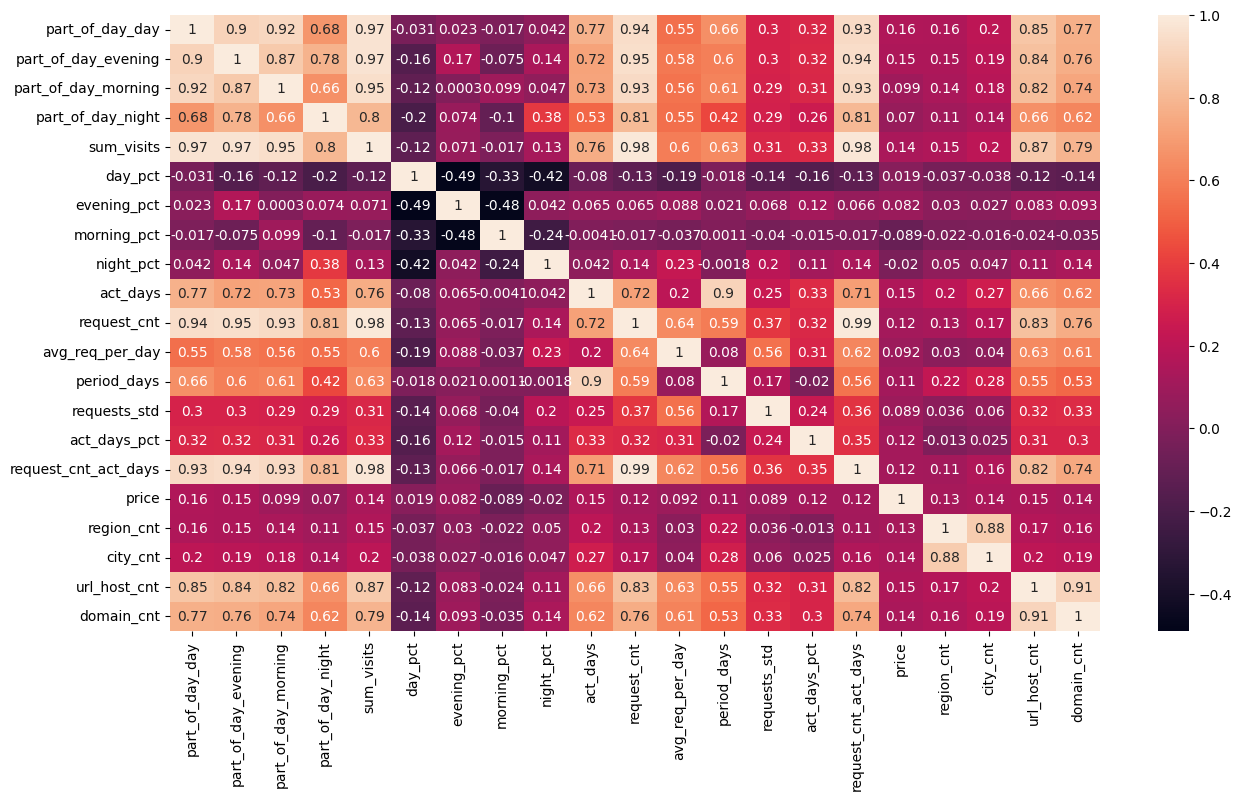

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(['user_id'], axis=1).corr(), 
            annot=True);

In [52]:
# исключим сильно скоррелированные признаки
cor_matrix = df.drop(['user_id'], axis=1).corr().abs()

upper_tri = cor_matrix.where(
    np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

to_drop = [
    column for column in upper_tri.columns if any(upper_tri[column] > 0.9)
]

df_clean = df.drop(to_drop, axis=1)

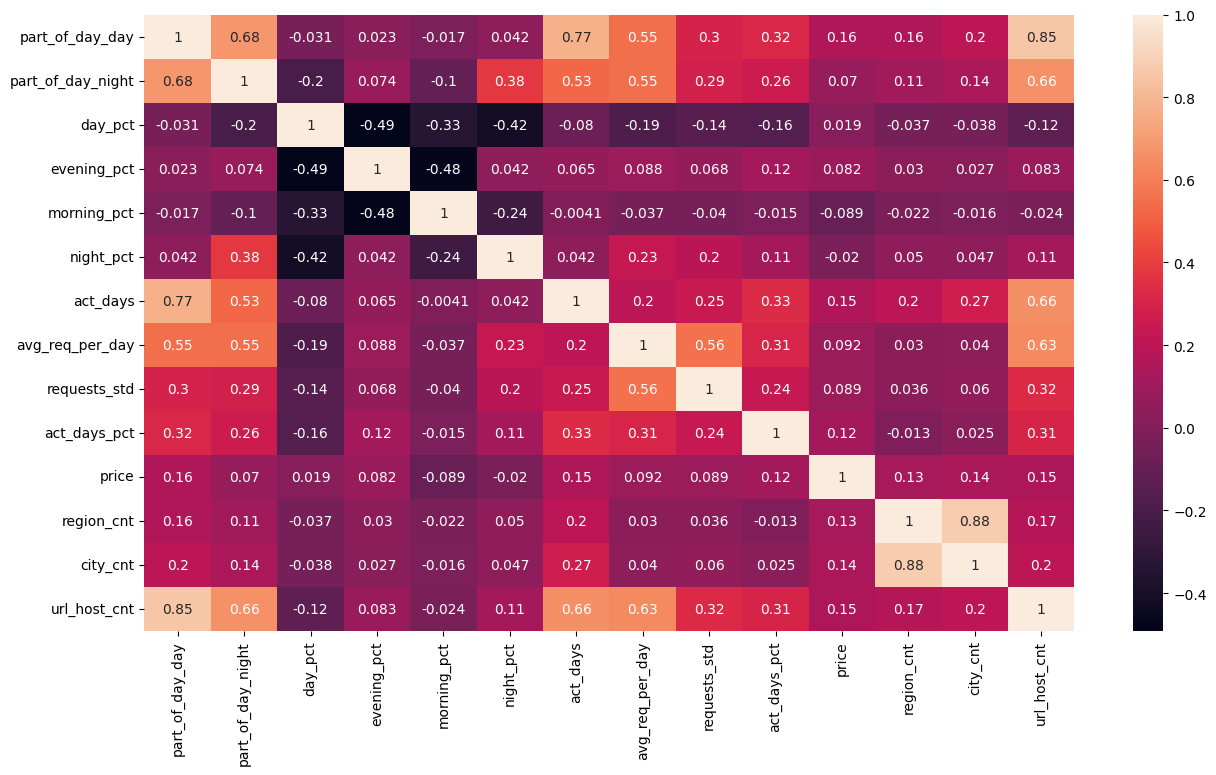

In [54]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.drop(['user_id'], axis=1).corr(), annot=True)

In [55]:
submit_id = pd.read_parquet('submit.pqt', engine='fastparquet')

In [56]:
public_train = pd.read_parquet('public_train.pqt')

In [57]:
public_train['age_bin'] = pd.cut(x=public_train['age'], 
                                 bins=[-1, 18, 25, 35, 45, 55, 65, 120], 
                                 labels=age_bins.values())

In [58]:
train_data = public_train.merge(df_clean, how='left', on='user_id')

In [59]:
submit_data = submit_id.merge(df_clean, how='left', on='user_id')

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270000 entries, 0 to 269999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   age                    269999 non-null  float64 
 1   is_male                269958 non-null  object  
 2   user_id                270000 non-null  int64   
 3   age_bin                269999 non-null  category
 4   part_of_day_day        270000 non-null  int16   
 5   part_of_day_night      270000 non-null  int16   
 6   day_pct                270000 non-null  float32 
 7   evening_pct            270000 non-null  float32 
 8   morning_pct            270000 non-null  float32 
 9   night_pct              270000 non-null  float32 
 10  act_days               270000 non-null  int16   
 11  avg_req_per_day        270000 non-null  float32 
 12  requests_std           270000 non-null  float32 
 13  act_days_pct           270000 non-null  float32 
 14  cpe_type_cd         

# Exploratory data analysis

## Gender

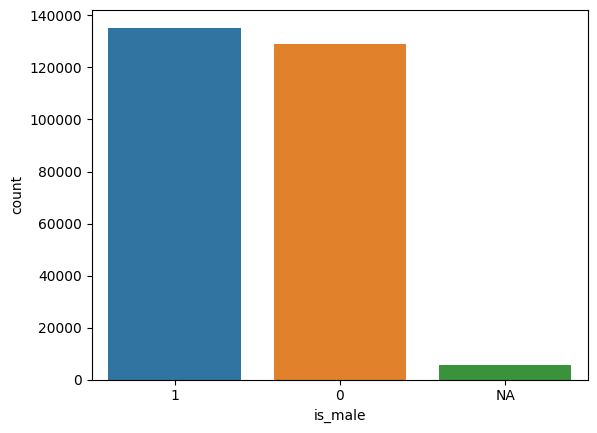

In [93]:
sns.countplot(x=train_data['is_male']);

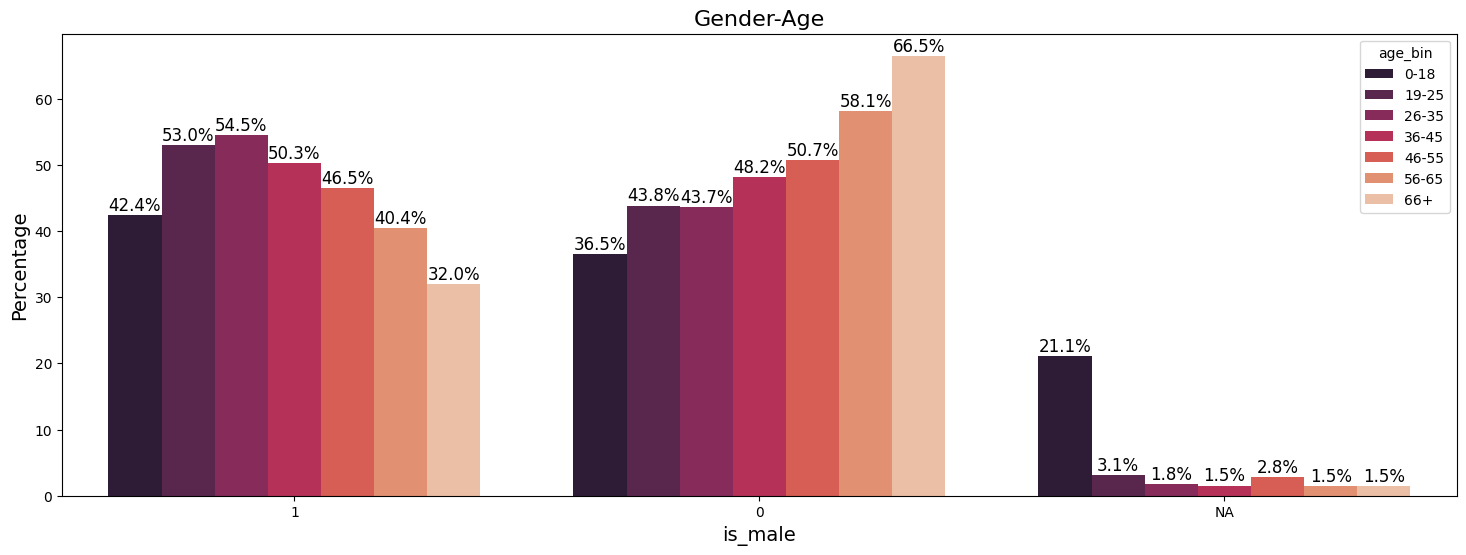

In [61]:
barplot_group(train_data, 'is_male', 'age_bin', 'Gender-Age')

Вывод: в возрасте от 0 до 45 лет в соотношении мужчин к женщинам есть небольшой перевес в пользу мужчин, от 46 до 66+ перевес в сторону женщин

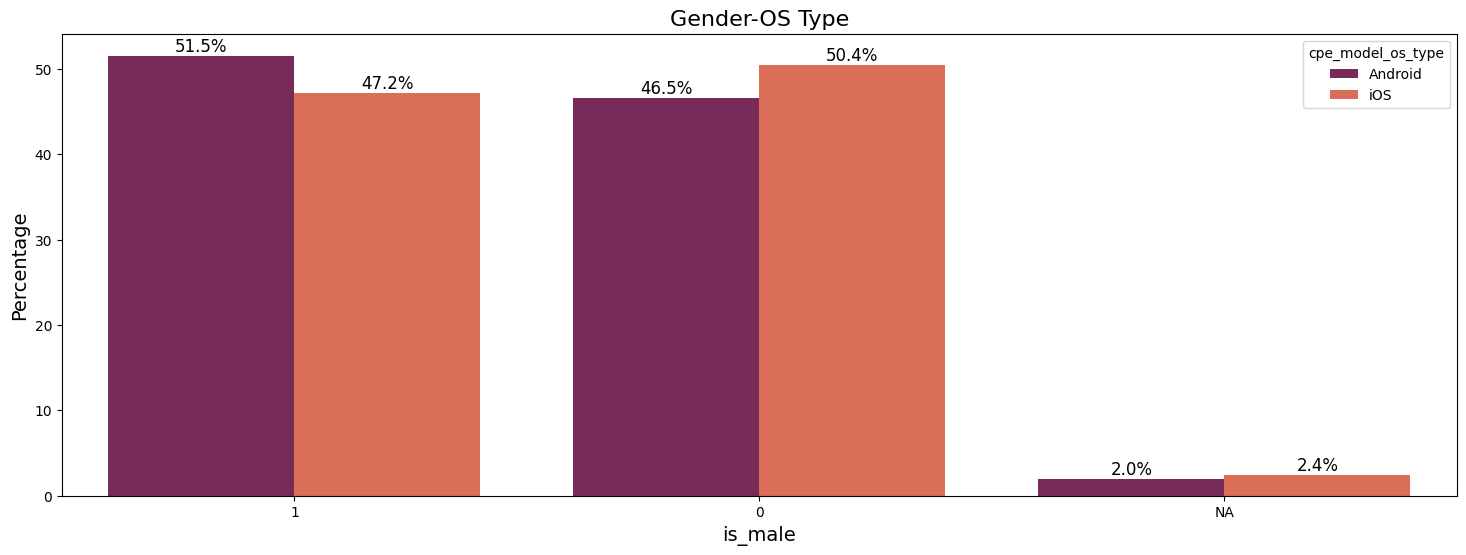

In [62]:
barplot_group(train_data, 'is_male', 'cpe_model_os_type', 'Gender-OS Type')

Вывод: среди пользователей Android небольшой перевес в соотношении в пользу мужчин, среди пользователей iOS - в пользу женщин

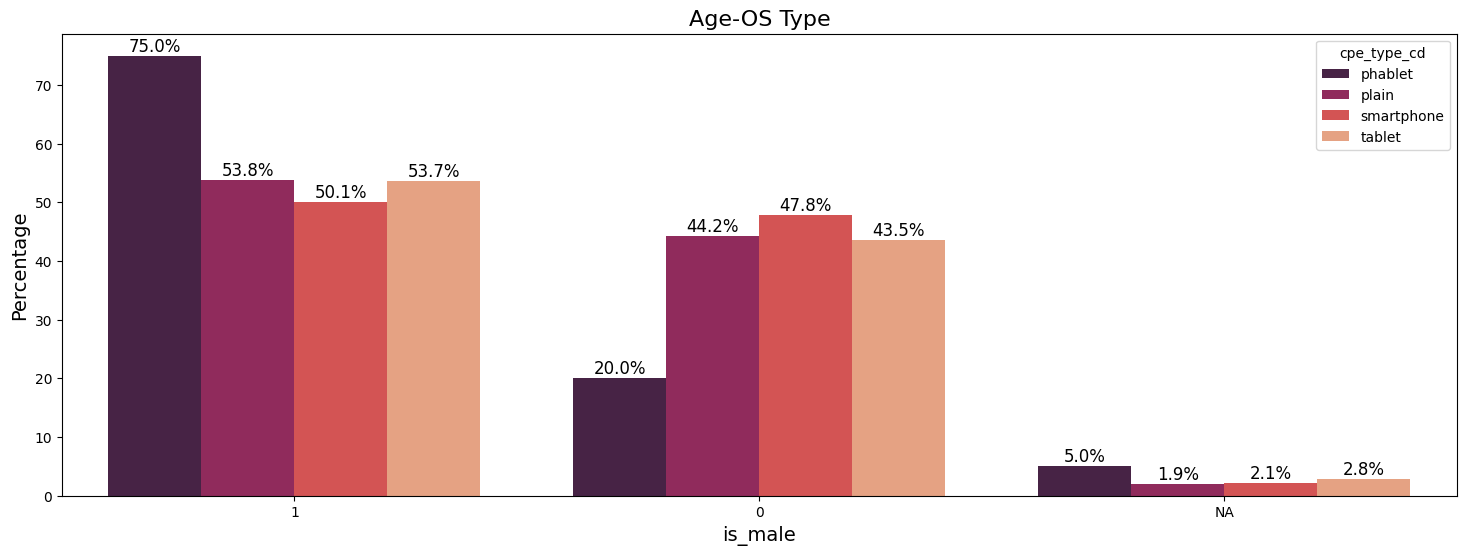

In [63]:
barplot_group(train_data, 'is_male', 'cpe_type_cd', 'Age-OS Type')

Вывод: 75% пользователей phablet - мужчины, в остальных категориях соотношение примерно равное

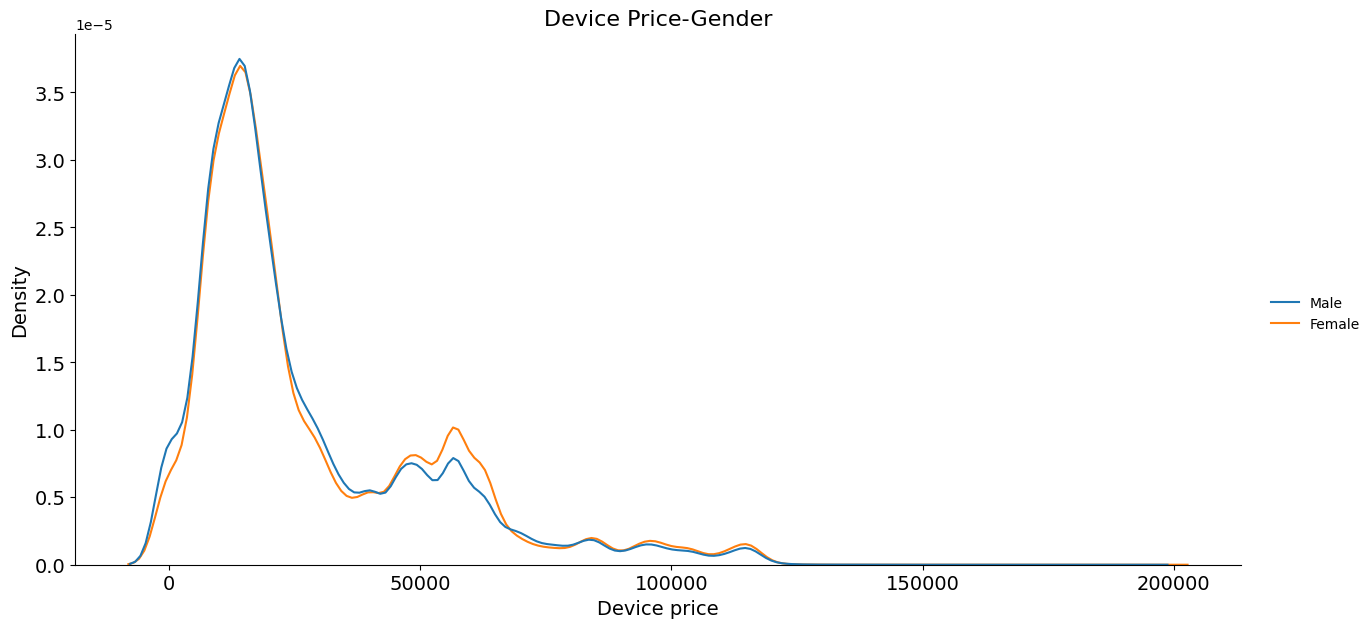

In [64]:
sns.displot(
    {
        "Male": train_data[train_data['is_male'] == '1'].price,
        "Female": train_data[train_data['is_male'] == '0'].price,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1)

plt.title('Device Price-Gender', fontsize=16)
plt.xlabel('Device price', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Вывод: в диапазоне цены девайса 50-70 тысяч небольшой перевес в пользу женщин, в остальном распределения очень похожи

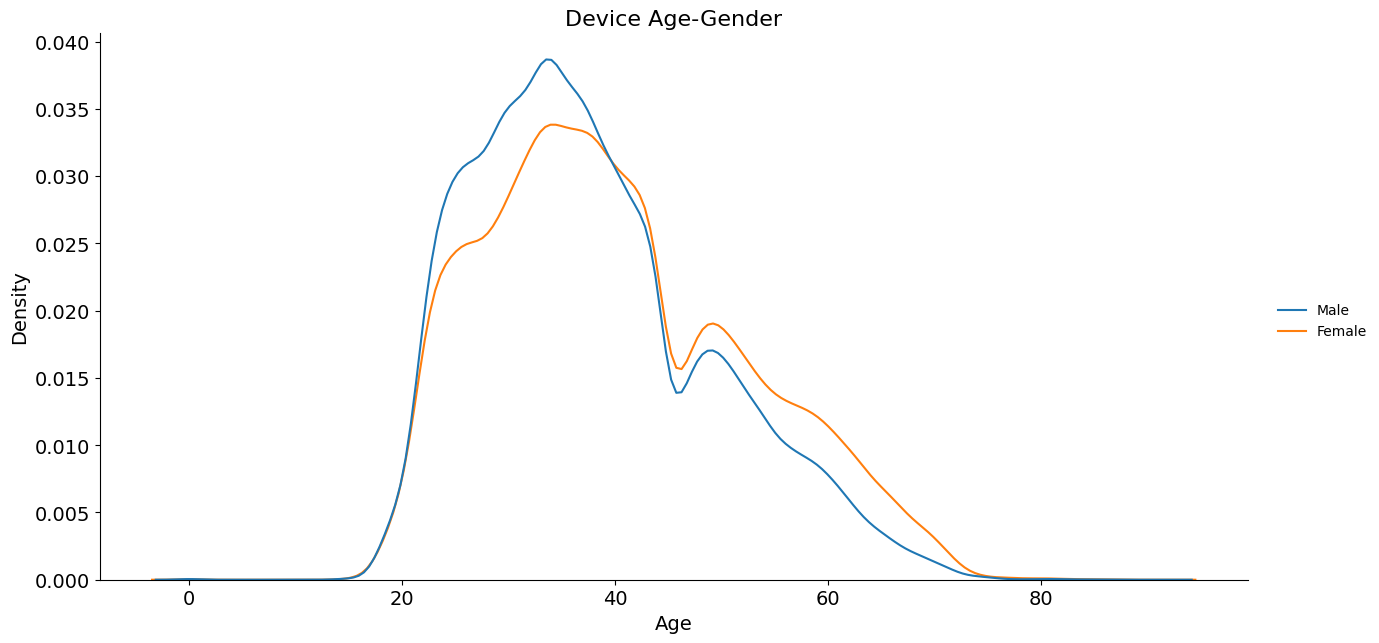

In [65]:
sns.displot(
    {
        "Male": train_data[train_data['is_male'] == '1'].age,
        "Female": train_data[train_data['is_male'] == '0'].age,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1)

plt.title('Device Age-Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Вывод: в возрасте от 22 до 40 большинство соотношение в пользу мужчин, в возрасте от 45 до 75 в пользу женщин

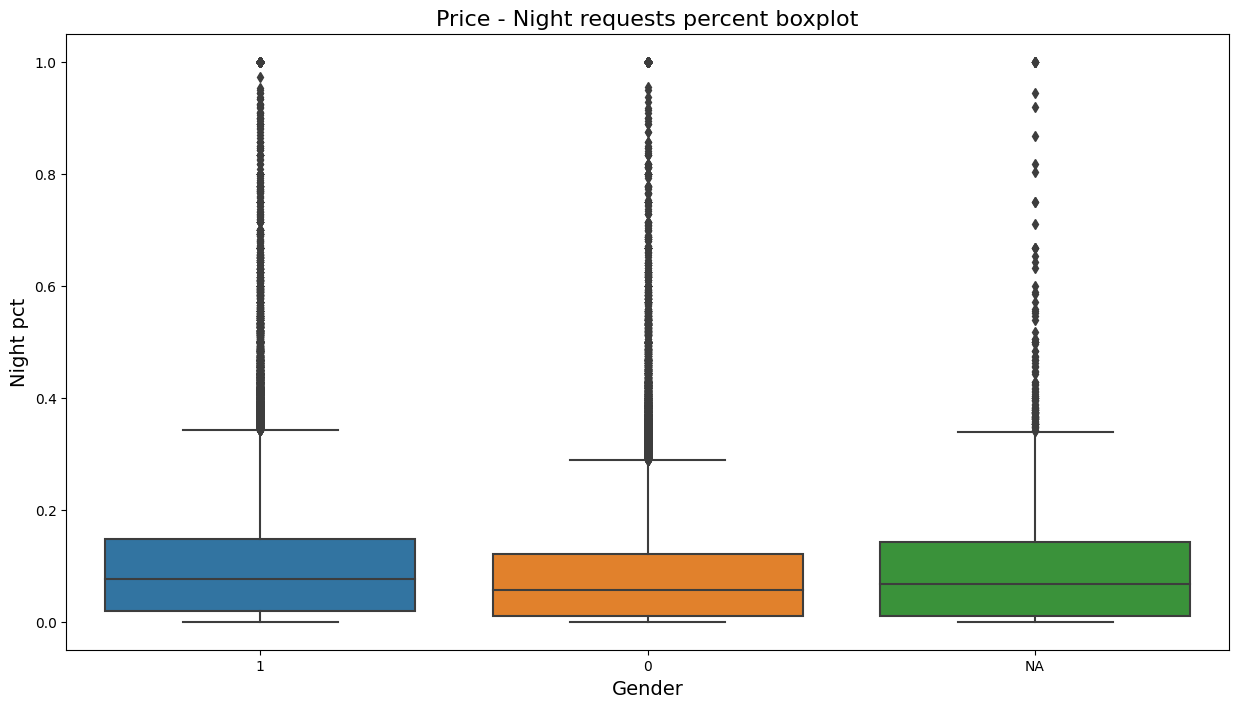

In [79]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=train_data,
           x='is_male',
           y='night_pct')

plt.title('Price - Night requests percent boxplot', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Night pct', fontsize=14);

Вывод: медианный процент ночных запросов у мужчин чуть выше, чем у женщин

## Age

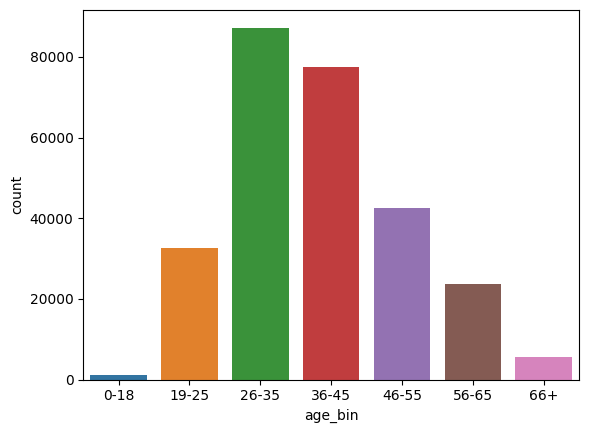

In [96]:
sns.countplot(x=train_data['age_bin']);

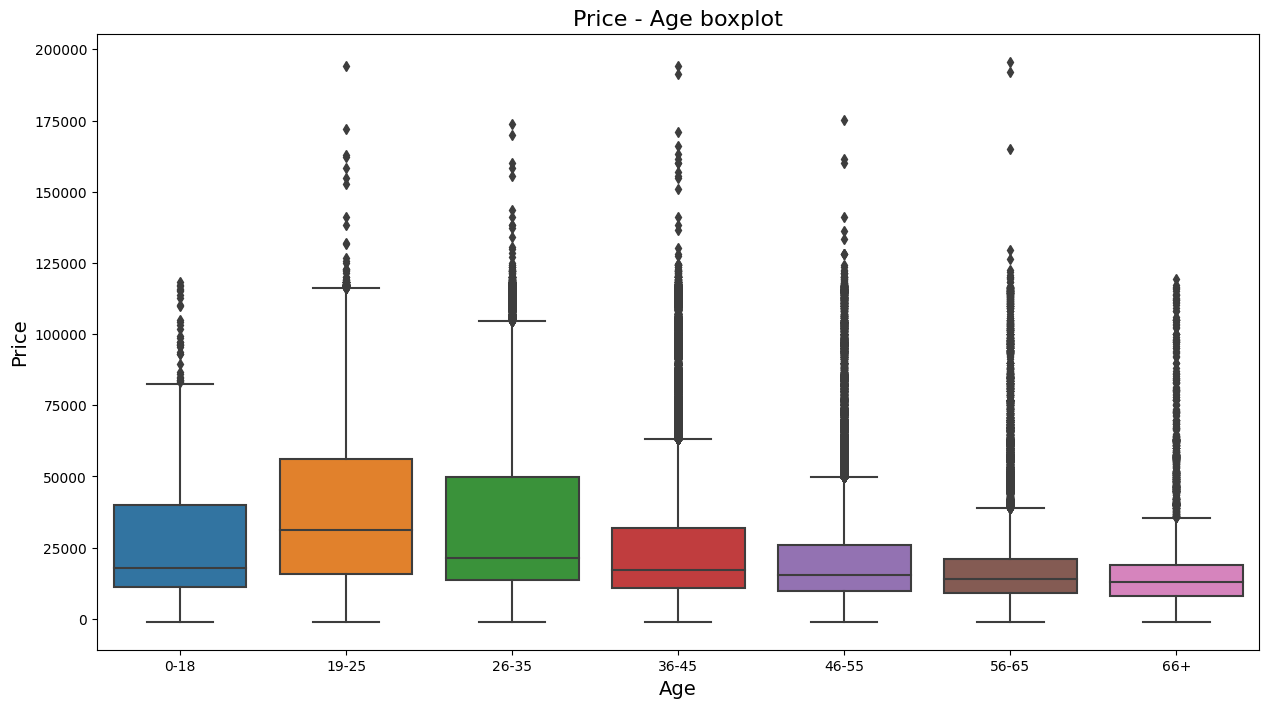

In [80]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=train_data,
           x='age_bin',
           y='price')

plt.title('Price - Age boxplot', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14);

Вывод: чем больше возраст, тем ниже медианная цена (кроме класса '0-18')

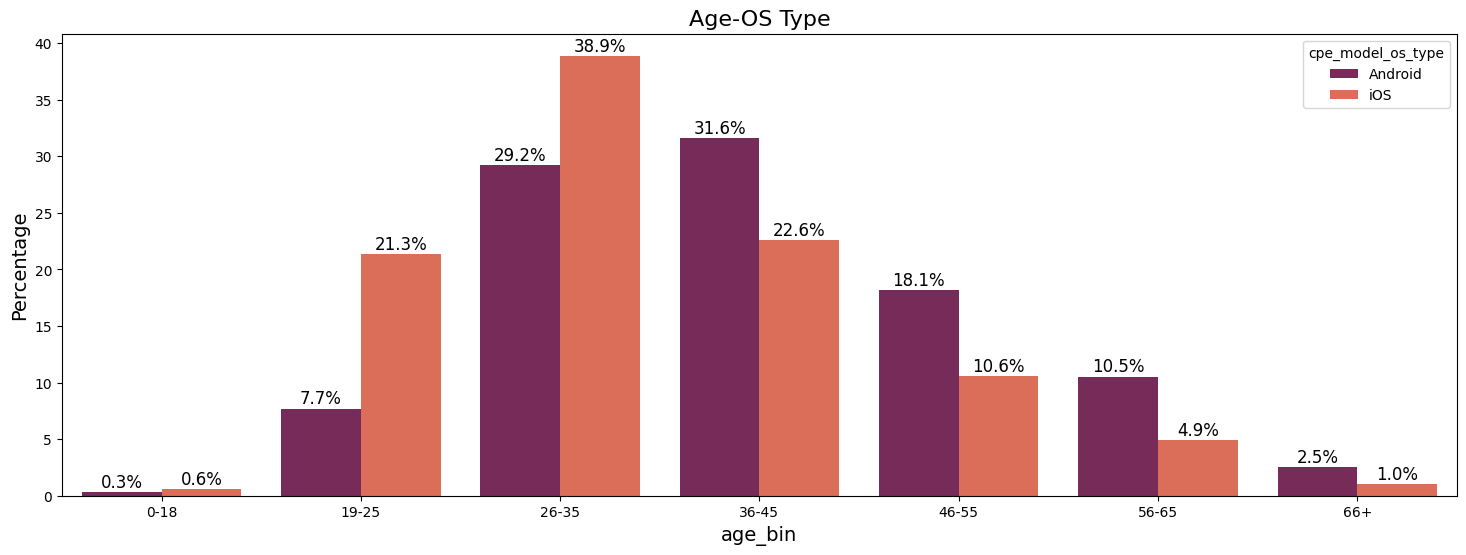

In [81]:
barplot_group(train_data, 'age_bin', 'cpe_model_os_type', 'Age-OS Type')

Вывод: по распределению пользователей по операционным системам видно, что пользователи iOS чуть моложе - самая большая часть пользователей в категории 26-35, у Android - 36-45

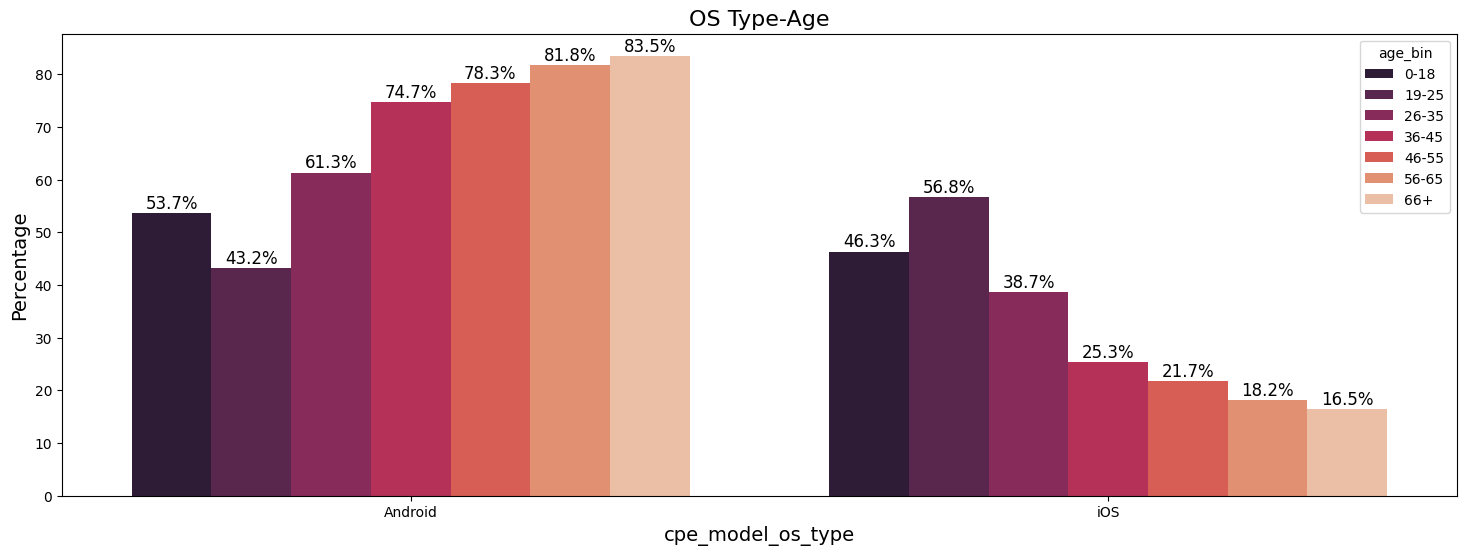

In [82]:
barplot_group(train_data, 'cpe_model_os_type', 'age_bin', 'OS Type-Age')

Вывод: соотношение пользователей в группе 19-25 в пользу iOS, в остальных группах намного чаще пользователи выбирают Android

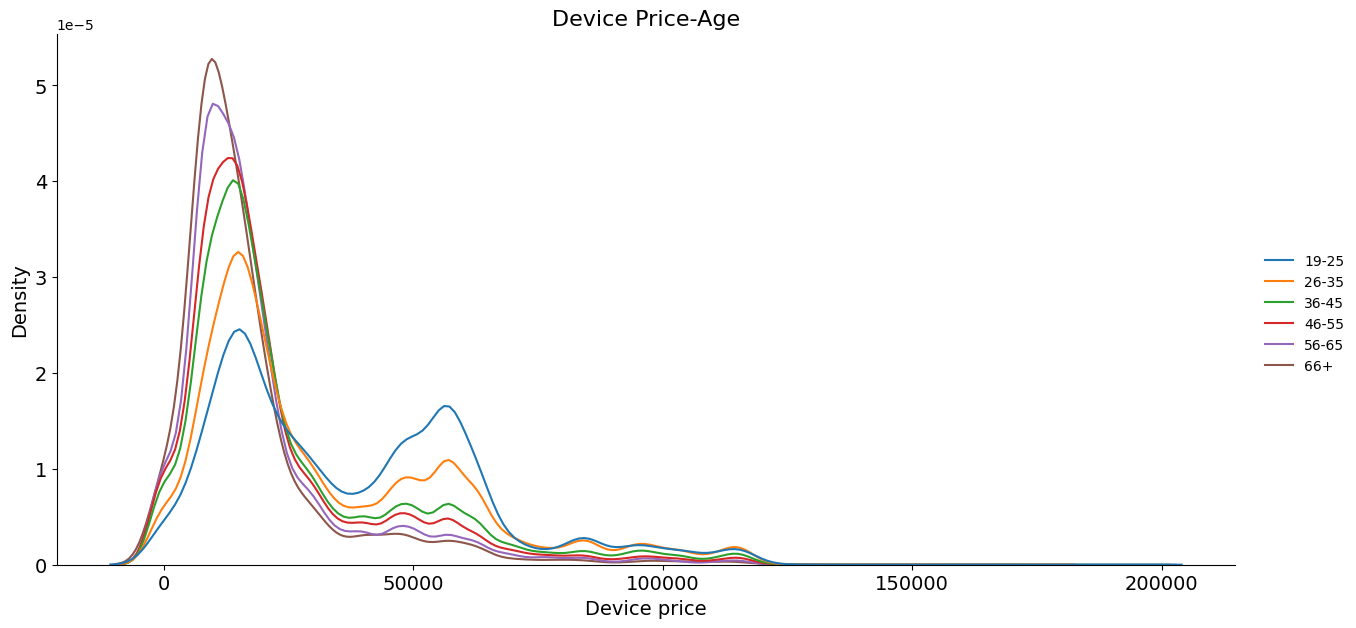

In [86]:
sns.displot(
    {
        "19-25": train_data[train_data['age_bin'] == '19-25'].price,
        "26-35": train_data[train_data['age_bin'] == '26-35'].price,
        "36-45": train_data[train_data['age_bin'] == '36-45'].price,
        "46-55": train_data[train_data['age_bin'] == '46-55'].price,
        "56-65": train_data[train_data['age_bin'] == '56-65'].price,
        "66+": train_data[train_data['age_bin'] == '66+'].price,
        
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1)

plt.title('Device Price-Age', fontsize=16)
plt.xlabel('Device price', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Вывод: у более старших людей более дешевые телефоны. В категории "19-25" большое кол-во людей с телефонами от 40 до 70 тысяч

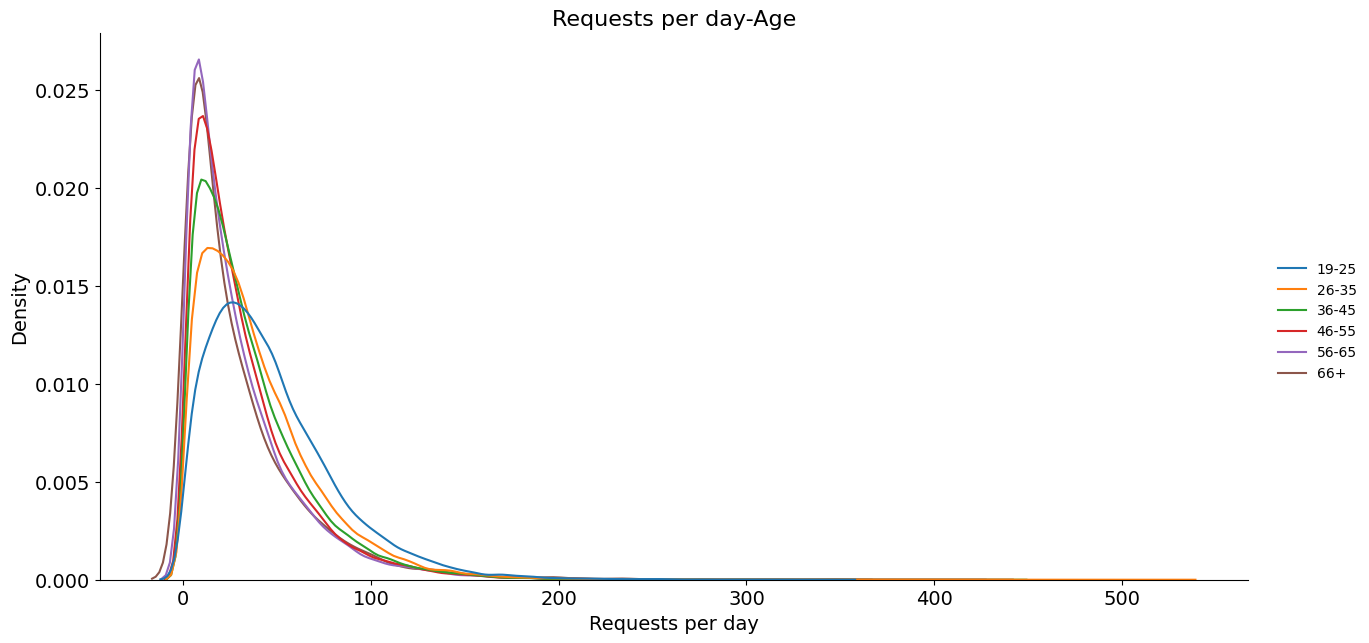

In [87]:
sns.displot(
    {
        "19-25": train_data[train_data['age_bin'] == '19-25'].avg_req_per_day,
        "26-35": train_data[train_data['age_bin'] == '26-35'].avg_req_per_day,
        "36-45": train_data[train_data['age_bin'] == '36-45'].avg_req_per_day,
        "46-55": train_data[train_data['age_bin'] == '46-55'].avg_req_per_day,
        "56-65": train_data[train_data['age_bin'] == '56-65'].avg_req_per_day,
        "66+": train_data[train_data['age_bin'] == '66+'].avg_req_per_day,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1)

plt.title('Requests per day-Age', fontsize=16)
plt.xlabel('Requests per day', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Вывод: чем старше человек, тем меньше запросов в день он делает

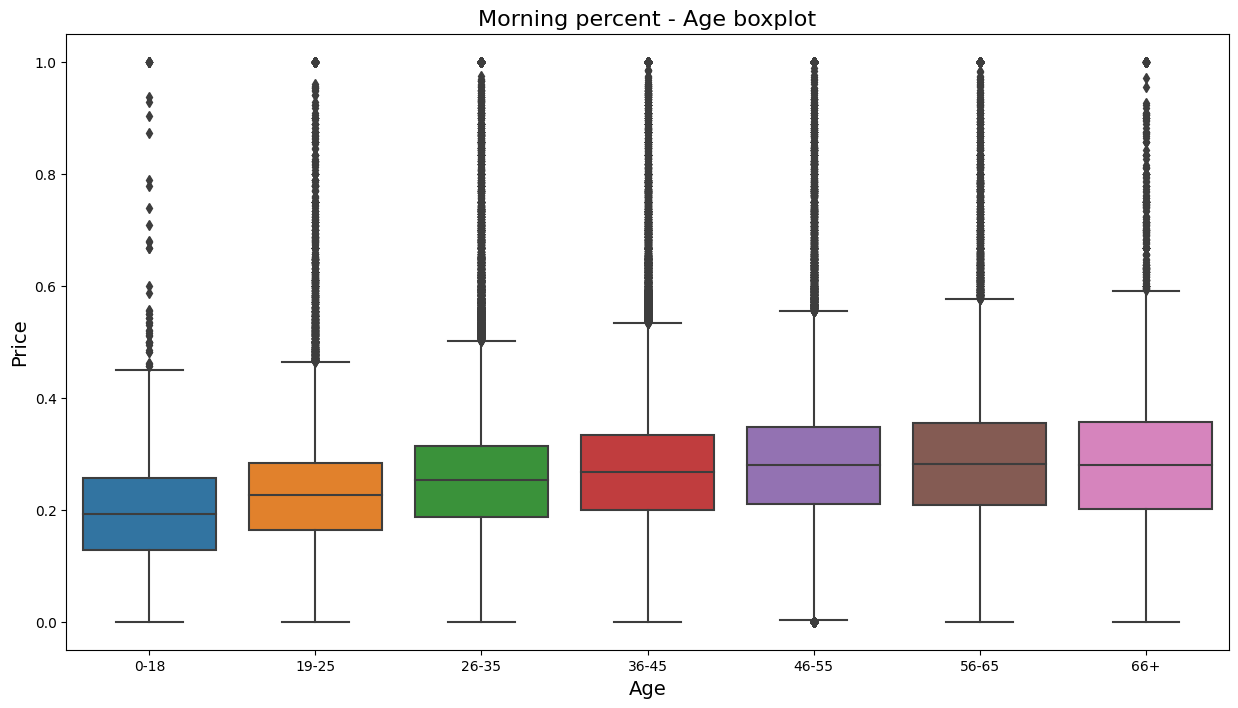

In [88]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=train_data,
           x='age_bin',
           y='morning_pct')

plt.title('Morning percent - Age boxplot', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14);

Вывод: чем старше человек, тем выше медианный процент запросов в утреннюю часть дня

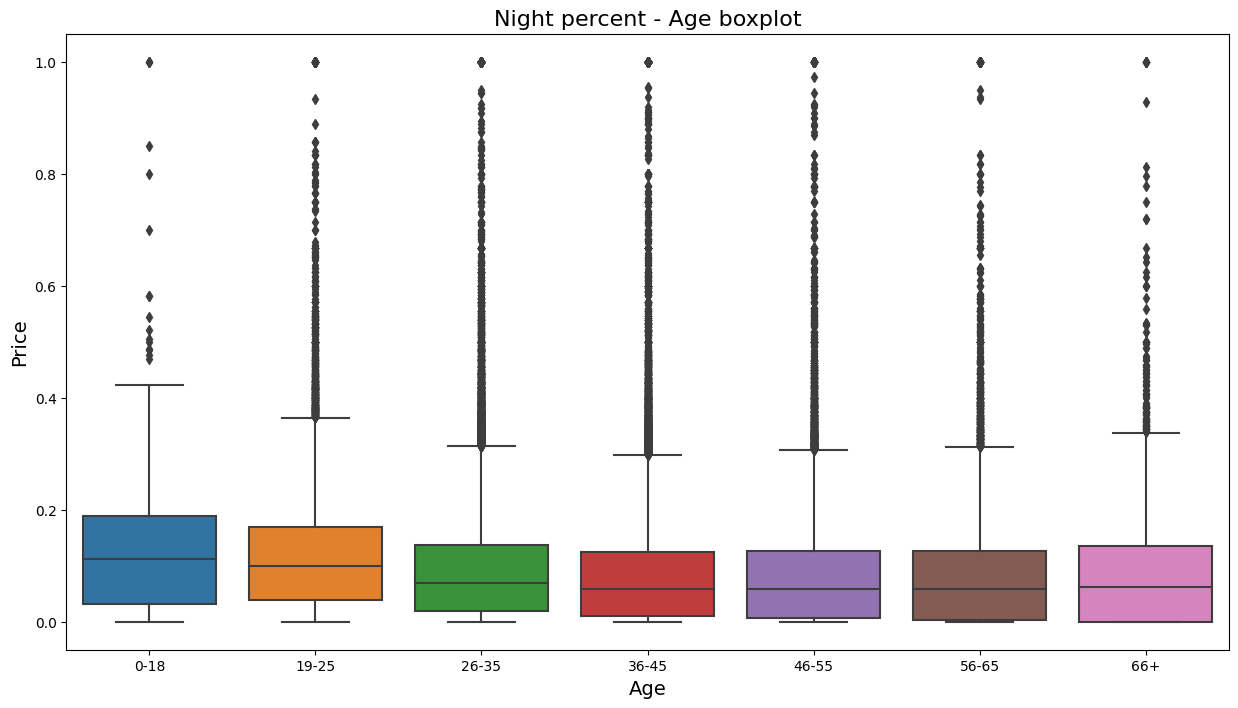

In [89]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=train_data,
           x='age_bin',
           y='night_pct')

plt.title('Night percent - Age boxplot', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14);

Вывод: чем моложе человек, тем выше медианный процент запросов в ночную часть дня

# Save dataframe for modeling

In [111]:
df_final = df.drop(to_drop, axis=1)

In [112]:
final_types = {
    'user_id': 'int32',
    'age': 'category',
    'part_of_day_day': 'int16',
    'part_of_day_night': 'int16',
    'day_pct': 'float32',
    'evening_pct': 'float32',
    'morning_pct': 'float32',
    'night_pct': 'float32',
    'act_days': 'int16',
    'avg_req_per_day': 'float32',
    'requests_std': 'float32',
    'act_days_pct': 'float32',
    'cpe_type_cd': 'category',
    'cpe_model_os_type': 'category',
    'cpe_manufacturer_name': 'category',
    'price': 'float32',
    'region_cnt': 'int8',
    'city_cnt': 'int8',
    'url_host_cnt': 'int16',
}

In [113]:
df_final.to_csv('df_final.csv', index=False)